#### Student name: Omar Elalem no.:8937288

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve,auc
from sklearn.metrics import precision_recall_curve, auc
from keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from PIL import Image



In [15]:

# Set up paths

data_folder = pathlib.Path( 'D:\conestoga\SubMLA\CSCN8010-lab-submissions\data')


train_dir = data_folder / "train"
valid_dir = data_folder / "valid"
test_dir = data_folder / "test"



In [29]:
class_folders = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
class_image_counts = {}
for class_folder in class_folders:
    class_path = os.path.join(train_dir, class_folder)
    num_images = len(os.listdir(class_path))
    class_image_counts[class_folder] = num_images
sorted_classes = sorted(class_image_counts.items(), key=lambda x: x[1], reverse=True)
top_three_classes = sorted_classes[:3]
print(top_three_classes)
print("Top three classes with the highest number of images:")
classes = ['class1', 'class2', 'class3']
countt=0
for class_name, count in top_three_classes:
    print(f"{class_name}: {count} images")
    classes[countt]=top_three_classes[countt][0]
    countt=countt+1
print(classes)






[('RUFOUS TREPE', 263), ('HOUSE FINCH', 248), ('D-ARNAUDS BARBET', 233)]
Top three classes with the highest number of images:
RUFOUS TREPE: 263 images
HOUSE FINCH: 248 images
D-ARNAUDS BARBET: 233 images
['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET']


In [30]:

for species in os.listdir(train_dir):
    if species not in classes:
        delete_path_train = os.path.join(train_dir, species)
        if os.path.isdir(delete_path_train):
            shutil.rmtree(delete_path_train)

for species in os.listdir(test_dir):
    if species not in classes:
        delete_path_test = os.path.join(test_dir, species)
        if os.path.isdir(delete_path_test):
            shutil.rmtree(delete_path_test)

for species in os.listdir(valid_dir):
    if species not in classes:
        delete_path_valid = os.path.join(valid_dir, species)
        if os.path.isdir(delete_path_valid):
            shutil.rmtree(delete_path_valid)

In [33]:
# Data Augmentation
datagene = ImageDataGenerator( rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,   
    fill_mode='nearest'
    )

train_generator = datagene.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='categorical',
    classes=classes
)
valid_generator =datagene.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = datagene.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 744 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [37]:
class_folders = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
class_image_counts = {}
for class_folder in class_folders:
    class_path = os.path.join(train_dir, class_folder)
    num_images = len(os.listdir(class_path))
    class_image_counts[class_folder] = num_images
sorted_classes = sorted(class_image_counts.items(), key=lambda x: x[1], reverse=True)
top_three_classes = sorted_classes[:3]
print(top_three_classes)
print("Top three classes with the highest number of images:")
for class_name, count in top_three_classes:
    print(f"{class_name}: {count} images")

[('RUFOUS TREPE', 263), ('HOUSE FINCH', 248), ('D-ARNAUDS BARBET', 233)]
Top three classes with the highest number of images:
RUFOUS TREPE: 263 images
HOUSE FINCH: 248 images
D-ARNAUDS BARBET: 233 images


In [38]:
num_batches = len(train_generator)
print("Number of batches in train_generator:", num_batches)

Number of batches in train_generator: 24


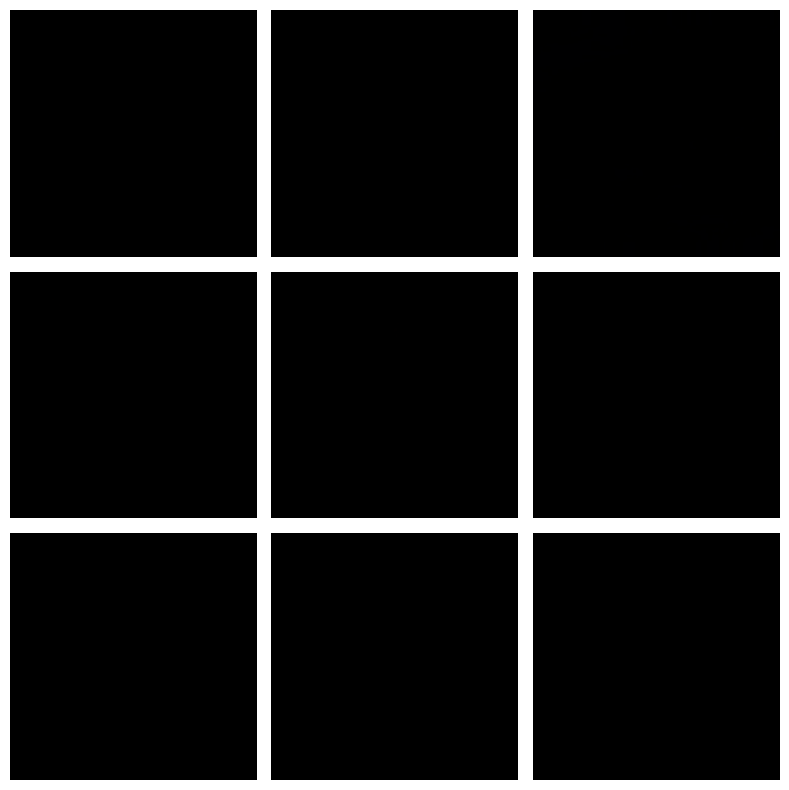

In [39]:
plt.figure(figsize=(8, 8))
for i in range(9):
    image, label = train_generator.next()
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[0].astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()

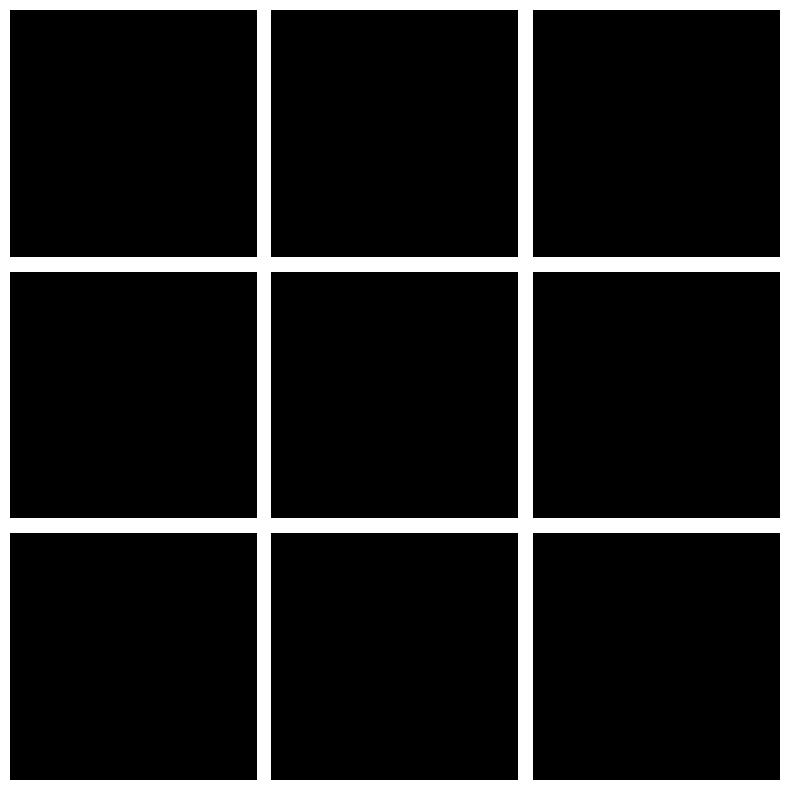

In [36]:
plt.figure(figsize=(8, 8))
for i in range(9):
    image, label = train_generator.next()
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[0].astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [40]:
bas_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
bas_model.summary()

58889256/58889256 [==============================] - 18s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                             

In [41]:
x = bas_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=bas_model.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### training the model using fit method

In [43]:
history = model.fit(train_generator,epochs=10,validation_data=valid_generator)

Epoch 1/10
15/24 [=================>............] - ETA: 49:57 - loss: 1.8504 - accuracy: 0.3487

evaluating the model and getting th metrix the precision recall curve and calculating AUC

In [ ]:
y_prd = model.predict(valid_generator)
y_pred_tre = valid_generator.classes
y_pred_cls = np.argmax(y_prd, axis=1)
accuracy = accuracy_score(y_pred_cls, y_pred_cls)
confusion_mat = confusion_matrix(y_pred_tre, y_pred_cls)
confusion_mat
report = classification_report(y_pred_tre, y_pred_cls,target_names=valid_generator.class_indices.keys())
fpr, tpr, thresholds = roc_curve(y_pred_tre, y_prd[:, 0], pos_label=1)
roc_auc = auc(fpr, tpr)

In [ ]:
print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", report)
print("ROC AUC: ", roc_auc)

#### ROC curve

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()